In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import string

In [70]:
# 3d config.yaml file path
camera12_config_path = "/home/ws523/marmoset_tracking_DLCv2/marmoset_tracking_middle_camera_new_pos3_camera23-weikang-2022-09-20-3d/"

# 3d analyzed video path
camera12_analyzed_path = "/ysm-gpfs/pi/jadi/VideoTracker_SocialInter/test_video_3d/20220920_Dodson_Scorch_camera23/"
      
# h5 files for the analyzed videos
camera12_h5_file = camera12_analyzed_path + "20220920_Dodson_Scorch_weikang.h5"

# h5 files for save 
camera12_h5_file_save = camera12_analyzed_path + "20220920_Dodson_Scorch_weikang.h5"

# meta pickle data for the analyzed videos
camera12_metapickle_file = camera12_analyzed_path + "20220920_Dodson_Scorch_weikang_meta.pickle"

# load data
camera12_metapickle_data = pd.read_pickle(camera12_metapickle_file)

camera12_h5_data = pd.read_hdf(camera12_h5_file)


In [71]:
# get the fps of the analyzed video
import cv2
video_cam1_file = camera12_analyzed_path + "20220920_Dodson_Scorch_camera-2.mp4"
cam = cv2.VideoCapture(video_cam1_file)
fps1 = cam.get(cv2.CAP_PROP_FPS)
video_cam2_file = camera12_analyzed_path + "20220920_Dodson_Scorch_camera-3.mp4"
cam = cv2.VideoCapture(video_cam2_file)
fps2 = cam.get(cv2.CAP_PROP_FPS)
fps = fps1
fps

29.97002997002997

In [72]:
# analysis
ncols = camera12_h5_data.shape[1]
nframes = camera12_h5_data.shape[0]
animal_names = []
body_parts = []
xyz_axis = []

for i in np.arange(0,ncols,1):
    animal_names.append(camera12_h5_data.columns[i][1])
    body_parts.append(camera12_h5_data.columns[i][2])
    xyz_axis.append(camera12_h5_data.columns[i][3])
  
    # fill in the nan data point
    data_point = camera12_h5_data.iloc[:,i]
    data_point_filled = data_point.interpolate(method='nearest',limit_direction='both')
    data_point_filled = data_point_filled.interpolate(method='linear',limit_direction='both')
    # smooth the data point   
    # data_point_filtered = data_point_filled.rolling(window=5, win_type='gaussian', center=True).mean(std=0.5)
    #
    # camera12_h5_data.iloc[:,i] = data_point_filled
    
animal_names_unique = pd.unique(animal_names)
print(animal_names_unique)
body_parts_unique = pd.unique(body_parts)
print(body_parts_unique)

# camera12_h5_data.to_hdf(camera12_h5_file_save, key = "camera12_h5_data")


['dodson' 'scorch']
['rightTuft' 'whiteBlaze' 'leftTuft' 'rightEye' 'leftEye' 'mouth']


In [73]:
# find the location of each body part
body_part_locs = {}
for iname in animal_names_unique:
    for ibody in body_parts_unique:
        ind = np.isin(animal_names,iname) & np.isin(body_parts,ibody)
        body_part_locs[(iname,ibody)] = camera12_h5_data.iloc[:,ind]    

In [74]:
camera12_h5_data.head(20)

scorer        weikang                                                       \
individuals    dodson                                                        
bodyparts   rightTuft                      whiteBlaze                        
coords              x         y          z          x         y          z   
0                 NaN       NaN        NaN        NaN       NaN        NaN   
1                 NaN       NaN        NaN        NaN       NaN        NaN   
2                 NaN       NaN        NaN        NaN       NaN        NaN   
3                 NaN       NaN        NaN        NaN       NaN        NaN   
4                 NaN       NaN        NaN        NaN       NaN        NaN   
5                 NaN       NaN        NaN        NaN       NaN        NaN   
6                 NaN       NaN        NaN        NaN       NaN        NaN   
7                 NaN       NaN        NaN        NaN       NaN        NaN   
8                 NaN       NaN        NaN        NaN       NaN        NaN   
9                 NaN       NaN        NaN        NaN       NaN        NaN   
10                NaN       NaN        NaN        NaN       NaN        NaN   
11                NaN       NaN        NaN        NaN       NaN        NaN   
12                NaN       NaN        NaN        NaN       NaN        NaN   
13                NaN       NaN        NaN        NaN       NaN        NaN   
14                NaN       NaN        NaN        NaN       NaN        NaN   
15           5.772147  0.390556  17.504880        NaN       NaN        NaN   
16           5.697660  0.366239  17.433787   6.348353  1.164766  18.119274   
17           5.608724  0.322685  17.447958        NaN       NaN        NaN   
18                NaN       NaN        NaN        NaN       NaN        NaN   
19                NaN       NaN        NaN   6.215459  1.106197  18.017800   

scorer                                  ...                                  \
individuals                             ...     scorch                        
bodyparts   leftTuft          rightEye  ...   leftTuft   rightEye             
coords             x   y   z         x  ...          z          x         y   
0                NaN NaN NaN       NaN  ...  16.341799 -13.209852 -1.650895   
1                NaN NaN NaN       NaN  ...  16.366645 -13.107201 -1.596444   
2                NaN NaN NaN       NaN  ...  16.356195 -13.110885 -1.579378   
3                NaN NaN NaN       NaN  ...  16.310704 -13.100975 -1.562316   
4                NaN NaN NaN       NaN  ...  16.204690 -13.100355 -1.556393   
5                NaN NaN NaN       NaN  ...  16.175293 -13.075063 -1.535615   
6                NaN NaN NaN       NaN  ...  16.206195 -13.004389 -1.499081   
7                NaN NaN NaN       NaN  ...  16.189510 -12.961522 -1.478053   
8                NaN NaN NaN       NaN  ...  16.215595 -12.907240 -1.450821   
9                NaN NaN NaN       NaN  ...  16.185524 -12.909976 -1.427612   
10               NaN NaN NaN       NaN  ...  16.163599 -12.882067 -1.411114   
11               NaN NaN NaN       NaN  ...  16.158844 -12.871458 -1.345726   
12               NaN NaN NaN       NaN  ...  16.129658 -12.779045 -1.254103   
13               NaN NaN NaN       NaN  ...  16.093075 -12.759908 -1.245379   
14               NaN NaN NaN       NaN  ...  16.071945 -12.760770 -1.235535   
15               NaN NaN NaN  6.031384  ...  16.023049 -12.772205 -1.217304   
16               NaN NaN NaN  6.022910  ...  15.870437        NaN       NaN   
17               NaN NaN NaN  6.080641  ...  15.854338        NaN       NaN   
18               NaN NaN NaN       NaN  ...  15.810931 -12.967866 -1.071800   
19               NaN NaN NaN  5.975682  ...  15.755456        NaN       NaN   

scorer                                                                       \
individuals                                                                   
bodyparts                 leftEye                           mouth       

In [75]:
eye_direction = {}
eye_contact_or_not = {}
look_at_face_or_not = {}
angle_thres = np.pi/36 # 5 degree
for iname in animal_names_unique:
    eye_dir_frames = []
    eye_contact_frames = []
    look_at_face_frames = []
    for iframe in np.arange(0,nframes,1):
        lefteye_loc = body_part_locs[(iname,'leftEye')].iloc[iframe,:].to_numpy()
        righteye_loc = body_part_locs[(iname,'rightEye')].iloc[iframe,:].to_numpy()
        lefttuft_loc = body_part_locs[(iname,'leftTuft')].iloc[iframe,:].to_numpy()
        righttuft_loc = body_part_locs[(iname,'rightTuft')].iloc[iframe,:].to_numpy()
        whiblz_loc = body_part_locs[(iname,'whiteBlaze')].iloc[iframe,:].to_numpy()
        mouth_loc = body_part_locs[(iname,'mouth')].iloc[iframe,:].to_numpy()
        
        Vect1 = lefteye_loc - righteye_loc
        Vect2 = whiblz_loc - mouth_loc
        Vect3 = lefttuft_loc - lefteye_loc
        Vect4 = righttuft_loc - righteye_loc
        
        try:       
            Vect1 = Vect1 / scipy.linalg.norm(Vect1)
            Vect2 = Vect2 / scipy.linalg.norm(Vect2) 
        except:
            Vect1 = Vect1
            Vect2 = Vect2
        eyesight_dir = np.cross(Vect1, Vect2)
        
        if ((np.dot(eyesight_dir, Vect3)>0) | (np.dot(eyesight_dir, Vect4)>0)):
            eyesight_dir = -eyesight_dir
        
        eye_dir_frames.append(eyesight_dir)
        
        
        # examine whether this animal is looking at the other's eyes or face
        if (iname == animal_names_unique[0]): 
            iname_other = animal_names_unique[1]
        elif (iname == animal_names_unique[1]): 
            iname_other = animal_names_unique[0]
            
        lefteye_loc_other = body_part_locs[(iname_other,'leftEye')].iloc[iframe,:].to_numpy()
        righteye_loc_other = body_part_locs[(iname_other,'rightEye')].iloc[iframe,:].to_numpy()
        lefttuft_loc_other = body_part_locs[(iname_other,'leftTuft')].iloc[iframe,:].to_numpy()
        righttuft_loc_other = body_part_locs[(iname_other,'rightTuft')].iloc[iframe,:].to_numpy()
        whiblz_loc_other = body_part_locs[(iname_other,'whiteBlaze')].iloc[iframe,:].to_numpy()
        mouth_loc_other = body_part_locs[(iname_other,'mouth')].iloc[iframe,:].to_numpy()
        
        # where left eye is looking
        # vector between body part
        vect1_lefteye = lefteye_loc_other - lefteye_loc
        vect2_lefteye = righteye_loc_other - lefteye_loc
        vect3_lefteye = lefttuft_loc_other - lefteye_loc
        vect4_lefteye = righttuft_loc_other - lefteye_loc
        vect5_lefteye = whiblz_loc_other - lefteye_loc
        vect6_lefteye = mouth_loc_other - lefteye_loc
        # angle between body part vector and eyesight direction
        angle1_lefteye =  np.sign(np.dot(eyesight_dir,vect1_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect1_lefteye/np.linalg.norm(vect1_lefteye)), -1.0, 1.0))       
        angle2_lefteye =  np.sign(np.dot(eyesight_dir,vect2_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect2_lefteye/np.linalg.norm(vect2_lefteye)), -1.0, 1.0))
        angle3_lefteye =  np.sign(np.dot(eyesight_dir,vect3_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect3_lefteye/np.linalg.norm(vect3_lefteye)), -1.0, 1.0))
        angle4_lefteye =  np.sign(np.dot(eyesight_dir,vect4_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect4_lefteye/np.linalg.norm(vect4_lefteye)), -1.0, 1.0))
        angle5_lefteye =  np.sign(np.dot(eyesight_dir,vect5_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect5_lefteye/np.linalg.norm(vect5_lefteye)), -1.0, 1.0))
        angle6_lefteye =  np.sign(np.dot(eyesight_dir,vect6_lefteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect6_lefteye/np.linalg.norm(vect6_lefteye)), -1.0, 1.0))
        
        # where right eye is looking
        # vector between body part
        vect1_righteye = lefteye_loc_other - righteye_loc
        vect2_righteye = righteye_loc_other - righteye_loc
        vect3_righteye = lefttuft_loc_other - righteye_loc
        vect4_righteye = righttuft_loc_other - righteye_loc
        vect5_righteye = whiblz_loc_other - righteye_loc
        vect6_righteye = mouth_loc_other - righteye_loc
        # angle between body part vector and eyesight direction
        angle1_righteye =  np.sign(np.dot(eyesight_dir,vect1_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect1_righteye/np.linalg.norm(vect1_righteye)), -1.0, 1.0))       
        angle2_righteye =  np.sign(np.dot(eyesight_dir,vect2_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect2_righteye/np.linalg.norm(vect2_righteye)), -1.0, 1.0))
        angle3_righteye =  np.sign(np.dot(eyesight_dir,vect3_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect3_righteye/np.linalg.norm(vect3_righteye)), -1.0, 1.0))
        angle4_righteye =  np.sign(np.dot(eyesight_dir,vect4_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect4_righteye/np.linalg.norm(vect4_righteye)), -1.0, 1.0))
        angle5_righteye =  np.sign(np.dot(eyesight_dir,vect5_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect5_righteye/np.linalg.norm(vect5_righteye)), -1.0, 1.0))
        angle6_righteye =  np.sign(np.dot(eyesight_dir,vect6_righteye))*np.arccos(np.clip(np.dot(eyesight_dir/np.linalg.norm(eyesight_dir), vect6_righteye/np.linalg.norm(vect6_righteye)), -1.0, 1.0))
        
        lefteye_contact_thres = ((angle1_lefteye>0)&(angle1_lefteye<angle_thres))|((angle2_lefteye>0)&(angle2_lefteye<angle_thres))
        lefteye_lookface_thres = ((angle3_lefteye>0)&(angle3_lefteye<angle_thres))|((angle4_lefteye>0)&(angle4_lefteye<angle_thres))|((angle5_lefteye>0)&(angle5_lefteye<angle_thres))|((angle6_lefteye>0)&(angle6_lefteye<angle_thres))
        righteye_contact_thres = ((angle1_righteye>0)&(angle1_righteye<angle_thres))|((angle2_righteye>0)&(angle2_righteye<angle_thres))
        righteye_lookface_thres = ((angle3_righteye>0)&(angle3_righteye<angle_thres))|((angle4_righteye>0)&(angle4_righteye<angle_thres))|((angle5_righteye>0)&(angle5_righteye<angle_thres))|((angle6_righteye>0)&(angle6_righteye<angle_thres))
        
        
        eye_contact_frames.append(np.int(lefteye_contact_thres|righteye_contact_thres))
        look_at_face_frames.append(np.int(lefteye_contact_thres|righteye_contact_thres|lefteye_lookface_thres|righteye_lookface_thres))
        
        
        
    # save to the summarized data
    eye_direction[(iname)] = eye_dir_frames
    eye_contact_or_not[(iname)] = eye_contact_frames
    look_at_face_or_not[(iname)] = look_at_face_frames
        

In [76]:
# sanity check
np.where(np.array(eye_contact_or_not['scorch'])==1)

(array([ 3021,  3023,  7339,  7340,  7341, 17003, 17004, 17005, 17006,
        17007, 17430, 17477]),)

In [77]:
# sanity check
np.where(np.array(eye_contact_or_not['dodson'])==1)

(array([1367]),)

In [78]:
# aligned with the audio
# get the session start time from "videosound_bhv_sync.py/.ipynb"
# currently the session_start_time will be manually typed in. It can be updated after a better method is used
session_start_time = 33.03 # in second
session_start_frame = session_start_time * fps # fps is 30Hz

In [79]:
eye_direction['time_in_second'] = np.arange(0,np.shape(eye_direction['dodson'])[0],1)/30 - session_start_time
eye_contact_or_not['time_in_second'] = np.arange(0,np.shape(eye_contact_or_not['dodson'])[0],1)/30 - session_start_time
look_at_face_or_not['time_in_second'] = np.arange(0,np.shape(look_at_face_or_not['dodson'])[0],1)/30 - session_start_time

In [80]:
# load behavioral results
bhv_data_path = "/home/ws523/marmoset_tracking_bhv_data_from_task_code/20220920_Dodson_Scorch/"
trial_record_json = bhv_data_path + "20220920_Scorch_Dodson_TrialRecord_1.json"
bhv_data_json = bhv_data_path + "20220920_Scorch_Dodson_bhv_data_1.json"
session_info_json = bhv_data_path + "20220920_Scorch_Dodson_session_info_1.json"

trial_record = pd.read_json(trial_record_json)
bhv_data = pd.read_json(bhv_data_json)
session_info = pd.read_json(session_info_json)

In [81]:
animal1 = session_info['lever1_animal'][0].lower()
animal2 = session_info['lever2_animal'][0].lower()

In [82]:
# clean up the trial_record
trial_record_clean = pd.DataFrame(columns=trial_record.columns)
for itrial in np.arange(0,np.max(trial_record['trial_number']),1):
    # trial_record_clean.loc[itrial] = trial_record[trial_record['trial_number']==itrial+1].iloc[[0]]
    trial_record_clean = trial_record_clean.append(trial_record[trial_record['trial_number']==itrial+1].iloc[[0]])
trial_record_clean = trial_record_clean.reset_index(drop = True)

In [83]:
# change bhv_data time to the absolute time
time_points_new = pd.DataFrame(np.zeros(np.shape(bhv_data)[0]),columns=["time_points_new"])
for itrial in np.arange(0,np.max(trial_record_clean['trial_number']),1):
    ind = bhv_data["trial_number"]==itrial+1
    new_time_itrial = bhv_data[ind]["time_points"] + trial_record_clean["trial_starttime"].iloc[itrial]
    time_points_new["time_points_new"][ind] = new_time_itrial
bhv_data["time_points"] = time_points_new["time_points_new"]

In [84]:
time_point_pull1 = bhv_data["time_points"][bhv_data["behavior_events"]==1]
time_point_pull2 = bhv_data["time_points"][bhv_data["behavior_events"]==2]
ind_lookatotherface1 = np.where(np.array(look_at_face_or_not[animal1])==1)
time_point_lookatotherface1 = look_at_face_or_not["time_in_second"][ind_lookatotherface1]
ind_lookatotherface2 = np.where(np.array(look_at_face_or_not[animal2])==1)
time_point_lookatotherface2 = look_at_face_or_not["time_in_second"][ind_lookatotherface2]

ind_eyecontact1 = np.where(np.array(eye_contact_or_not[animal1])==1)
time_point_eyecontact1 = eye_contact_or_not["time_in_second"][ind_eyecontact1]
ind_eyecontact2 = np.where(np.array(eye_contact_or_not[animal2])==1)
time_point_eyecontact2 = eye_contact_or_not["time_in_second"][ind_eyecontact2]

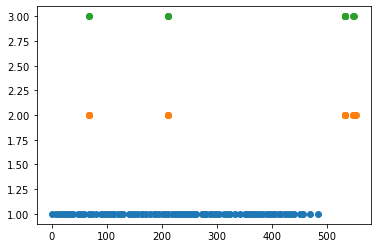

In [85]:
ind_plot = time_point_pull1 < 720
plt.plot(time_point_pull1[ind_plot], np.ones(np.shape(time_point_pull1[ind_plot])[0]),'o')
plt.plot(time_point_lookatotherface1, np.ones(np.shape(time_point_lookatotherface1)[0])*2,'o')
plt.plot(time_point_eyecontact1, np.ones(np.shape(time_point_eyecontact1)[0])*3,'o')

In [86]:
time_point_pull1

1         0.000007
3         8.490249
5        13.344332
7        18.632038
11       24.187912
          ...     
585    2859.787239
587    2861.205166
591    2865.808967
593    2867.293340
595    2874.700116
Name: time_points, Length: 126, dtype: float64

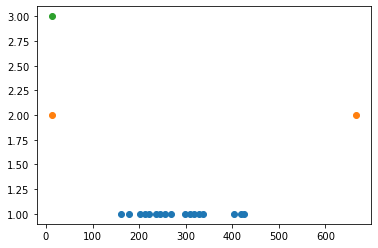

In [87]:
ind_plot = time_point_pull2 < 720
plt.plot(time_point_pull2[ind_plot], np.ones(np.shape(time_point_pull2[ind_plot])[0]),'o')
plt.plot(time_point_lookatotherface2, np.ones(np.shape(time_point_lookatotherface2)[0])*2,'o')
plt.plot(time_point_eyecontact2, np.ones(np.shape(time_point_eyecontact2)[0])*3,'o')

In [88]:
trial_record.head(20)

,first_pull_id,rewarded,task_type,trial_number,trial_starttime
0,1,1,1,1,0.000005
1,1,1,1,2,24.187911
2,1,1,1,3,47.756402
3,1,1,1,4,68.173985
4,1,1,1,5,89.824927
5,1,1,1,6,103.419679
6,1,1,1,7,125.156165
7,1,2,1,8,144.789223
8,1,2,1,9,161.272666
9,1,1,1,10,179.422954


In [89]:
bhv_data.head(40)

,behavior_events,time_points,trial_number
0,0,0.000005,1
1,1,0.000007,1
2,3,1.006748,1
3,1,8.490249,1
4,3,9.495514,1
5,1,13.344332,1
6,3,14.345585,1
7,1,18.632038,1
8,3,19.647105,1
9,9,21.037610,1
